In [1]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
shp_path = 'seoul\seoul.shp'
sf = shp.Reader(shp_path)

In [4]:
plt.figure()
for shape in sf.shapes():
    x = [i[0] for i in shape.points]
    y = [i[1] for i in shape.points]
    

<Figure size 432x288 with 0 Axes>

In [5]:
import glob
import pandas as pd
path = r"1\20180402"
allFiles = glob.glob(path+"\*.DAT")
list=[]
for filename in allFiles:
    df = pd.read_csv(filename, header = None)
    list.append(df)
a = pd.concat(list)

In [6]:
a = a.iloc[:,[0,1,2,4,8]]

In [7]:
a = a.rename(columns = {0:'id', 1:'longtitude', 2:'latitude', 4:'timestamp', 8:'assigned'})

In [8]:
a = a.sort_values(['id', 'timestamp']).reset_index(drop=True)
a2 = pd.DataFrame(a.shift(periods=-1, axis=0))
a3 = a.merge(a2, left_index=True, right_index=True, suffixes=('_prev', '_curr'))

In [9]:
a5 = a3[(a3['assigned_prev'] == 0) & (a3['assigned_curr'] == 1)]

In [10]:
a6 = a5[(a5['id_prev'] == a5['id_curr'])]

In [11]:
a7 = a6.loc[:,['latitude_curr','longtitude_curr']]

In [12]:
a7['latitude_curr'] = a7['latitude_curr']/10000000
a7['longtitude_curr'] = a7['longtitude_curr']/10000000

In [13]:
a9 = a8 = a7[(a7['latitude_curr']>30) & (a7['longtitude_curr']>120)]

In [14]:
a8.rename(columns={'longtitude_curr':'x','latitude_curr':'y'})

,y,x
1,37.546211,127.171070
218,37.544451,127.132700
467,37.548206,127.062811
773,37.470016,127.126844
890,37.478606,127.125795
1023,37.490226,127.123848
1290,37.559806,126.973049
1348,37.566164,126.988444
1445,37.509614,127.063025
1466,37.524938,127.052389


In [15]:
a8 = a8.rename(columns={'longtitude_curr':'x','latitude_curr':'y'})

In [16]:
columns = ['x','y']
a8 = a8[columns]

In [17]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [18]:
list=[]
for shape in sf.shapes():
    x = [i[0] for i in shape.points]
    y = [i[1] for i in shape.points]
    z=Polygon(shape.points)
    list.append([x,y,z])

In [19]:
df1 = pd.DataFrame(list)

In [20]:
df1.head()

,0,1,2
0,"[126.99253677911568, 126.99408646500719, 126.9...","[37.57385297137149, 37.57206363676337, 37.5710...","POLYGON ((126.9925367791157 37.57385297137149,..."
1,"[126.99101420294987, 126.99178376014727, 126.9...","[37.57335829370715, 37.57080433892872, 37.5707...","POLYGON ((126.9910142029499 37.57335829370715,..."
2,"[126.88453261245522, 126.8888084853972, 126.88...","[37.51787828853924, 37.51722331355958, 37.5140...","POLYGON ((126.8845326124552 37.51787828853924,..."
3,"[126.98377399263796, 126.98426019542022, 126.9...","[37.57947456155269, 37.579011472483295, 37.578...","POLYGON ((126.983773992638 37.57947456155269, ..."
4,"[126.98112204821622, 126.9823385946132, 126.98...","[37.581529787585126, 37.57996453678131, 37.578...","POLYGON ((126.9811220482162 37.58152978758513,..."


In [21]:
df1 = df1.rename(columns = {0:'x',1:'y',2:'polygon'})

In [22]:
df1['count']=0

In [23]:
for i in range(54053):
    point = Point([a8.iloc[i,0],a8.iloc[i,1]])
    for j in range(467):
        if df1.iloc[j,2].contains(point):
            df1.iloc[j,3]+=1

In [30]:
def plot_map_fill_multiples_ids_tone(df1,title,color_ton,bins,x_lim = None,y_lim = None,figsize = (11,9)):
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for i in range(467):
        x = df1.iloc[i,0]
        y = df1.iloc[i,1]
        ax.plot(x, y)
    for j in range(467):
        x = df1.iloc[j,0]
        y = df1.iloc[j,1]
        ax.fill(x,y, color_ton[j])
        x0 = np.mean(x)
        y0 = np.mean(y)
        plt.text(x0, y0, df1.iloc[j,3], fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [31]:
def calc_color(data, color=None):
        color_sq = ['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404']
        colors = 'YlOrBr'
        new_data, bins = pd.qcut(data, 6, retbins=True, labels=range(6))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val])
        colors = sns.color_palette(colors, n_colors=6)
        sns.palplot(colors, 0.6)
        for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+ " => "+str(int(bins[i+1])-1), end =" ")
        print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins

In [33]:
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))
title = 'demand on administrative district'


1: 0 => 5 
2: 6 => 15 
3: 16 => 34 
4: 35 => 83 
5: 84 => 201 
6: 202 => 1387 

   1   2   3   4   5   6


NameError: name 'x_lon' is not defined

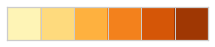

<Figure size 792x648 with 0 Axes>

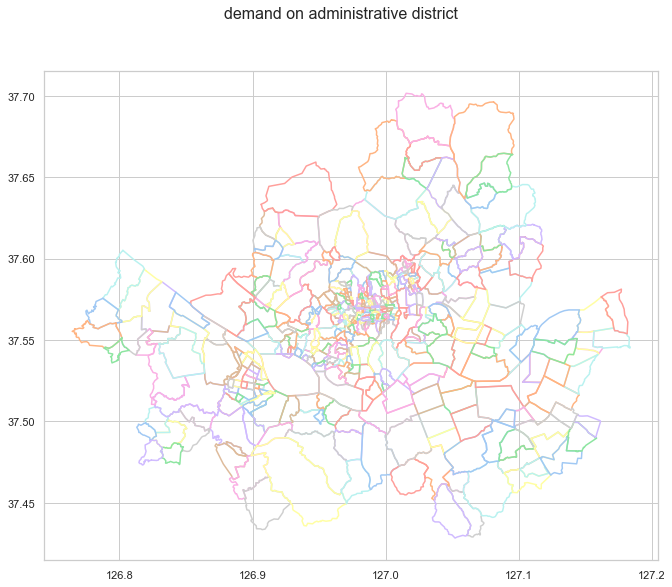

In [35]:
color_ton, bins = calc_color(df1['count'])
plot_map_fill_multiples_ids_tone(df1,title,color_ton,bins)

In [42]:
def plot_map_fill_multiples_ids_tone(df1,title,color_ton,bins,x_lim = None,y_lim = None,figsize = (15,10)):
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for i in range(467):
        x = df1.iloc[i,0]
        y = df1.iloc[i,1]
        ax.plot(x, y)
    for j in range(467):
        x = df1.iloc[j,0]
        y = df1.iloc[j,1]
        ax.fill(x,y, color_ton[j])
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [43]:
def calc_color(data, color=None):
        color_sq = ['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404']
        colors = 'YlOrBr'
        new_data, bins = pd.qcut(data, 6, retbins=True, labels=range(6))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val])
        colors = sns.color_palette(colors, n_colors=6)
        sns.palplot(colors, 0.6)
        for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+ " => "+str(int(bins[i+1])-1), end =" ")
        print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins


1: 0 => 5 
2: 6 => 15 
3: 16 => 34 
4: 35 => 83 
5: 84 => 201 
6: 202 => 1387 

   1   2   3   4   5   6


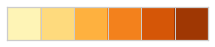

<Figure size 1080x720 with 0 Axes>

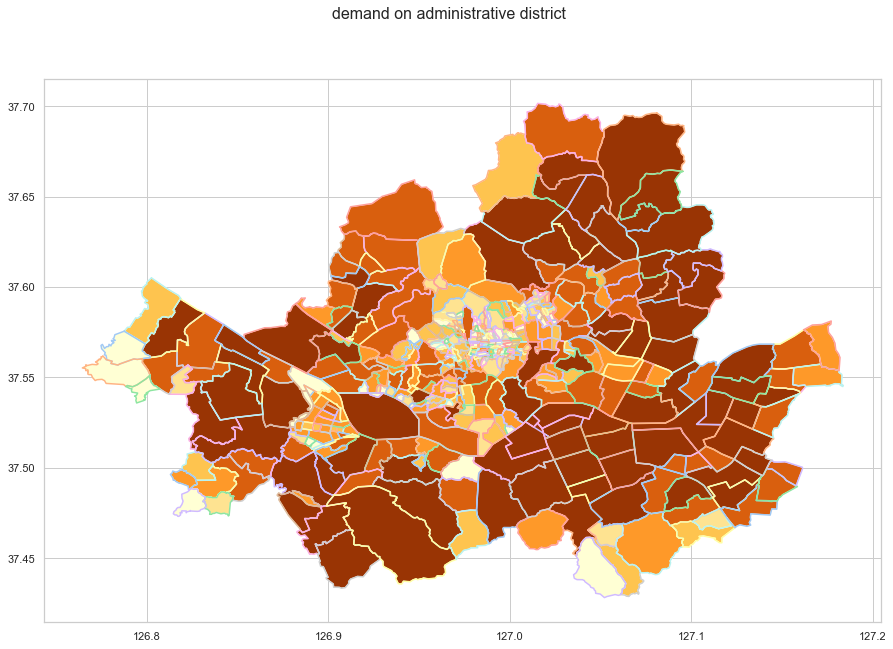

In [44]:
color_ton, bins = calc_color(df1['count'])
plot_map_fill_multiples_ids_tone(df1,title,color_ton,bins)